In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from preprocessing import load_events, load_bing_results, check_counts_and_merge, load_gni_class, load_gni_region, load_population, load_gdp
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Regression

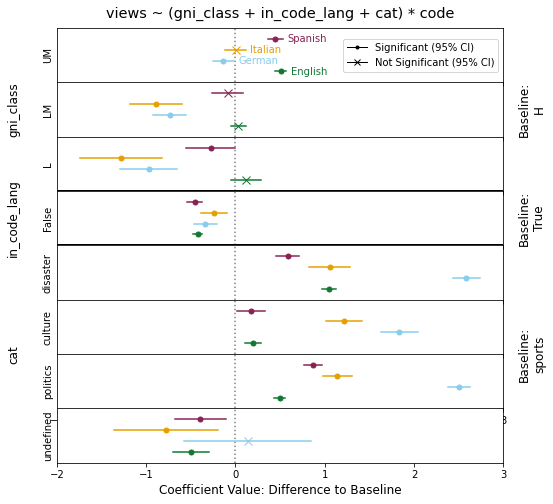

In [19]:
results_model_views0 = fit_regression_and_rename_coeffs(
    formula="views_7_sum ~ (C(gni_class, Treatment(reference='H')) + C(cat, Treatment(reference='sports')) + C(in_code_lang, Treatment(reference=True))) * C(code, Treatment(reference='en'))",
    df_reg=data[data.views_7_sum > np.log1p(10)])
fig_res = plot_regression_results(data, results_model_views0, ['gni_class', 'in_code_lang', 'cat'],
                                  {'gni_class': 'H', 'in_code_lang': True, 'cat': 'sports', 'code': 'en'},
                                  cat_dict={'en': 'English', 'it': 'Italian', 'es': 'Spanish', 'de': 'German'},
                                  title='views ~ (gni_class + in_code_lang + cat) * code', figsize=(8, 8),
                                  x_limits=(-2, 3), label_sort={'gni_class': ['UM', 'LM', 'L'],
                                                                'cat': ['disaster', 'culture', 'politics', 'undefined']})
fig_res.savefig('regression_plot.pdf')

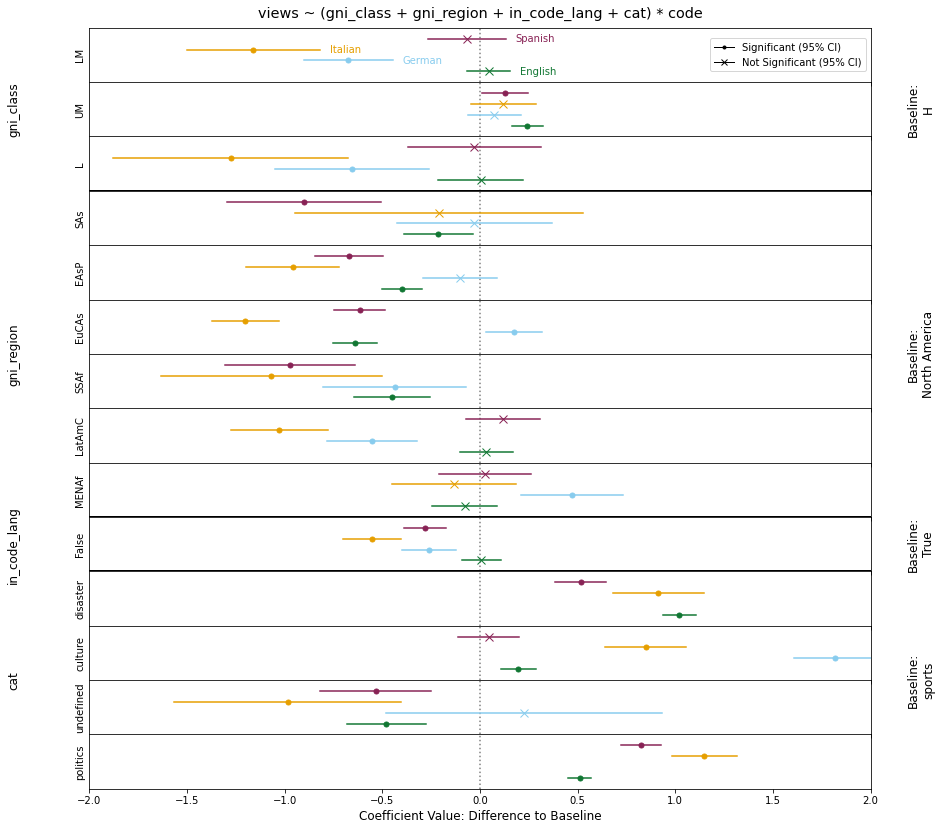

In [20]:
results_model_views1 = fit_regression_and_rename_coeffs(
    formula="views_7_sum ~ (C(gni_class, Treatment(reference='H')) + C(gni_region, Treatment(reference='North America')) + C(cat, Treatment(reference='sports')) + C(in_code_lang, Treatment(reference=True))) * C(code, Treatment(reference='en'))",
    df_reg=data[data.views_7_sum > np.log1p(10)])
fig_res = plot_regression_results(data, results_model_views1, ['gni_class', 'gni_region', 'in_code_lang', 'cat'],
                                  {'gni_class': 'H', 'in_code_lang': True, 'gni_region': 'North America',
                                   'cat': 'sports', 'code': 'en'},
                                  cat_dict={'en': 'English', 'it': 'Italian', 'es': 'Spanish', 'de': 'German'},
                                  title='views ~ (gni_class + gni_region + in_code_lang + cat) * code', label_rename_dict={'Middle East & North Africa': 'MENAf', 'Latin America & Caribbean': 'LatAmC', 'Europe & Central Asia': 'EuCAs', 'East Asia & Pacific': 'EAsP', 'North America': 'NAm', 'Sub-Saharan Africa': 'SSAf', 'South Asia': 'SAs'},
                                  figsize=(14, 14), x_limits=(-2, 2))
#write_reg_results(results_model_views1, 'model2')
fig_res.savefig('regression_plot_2.pdf')

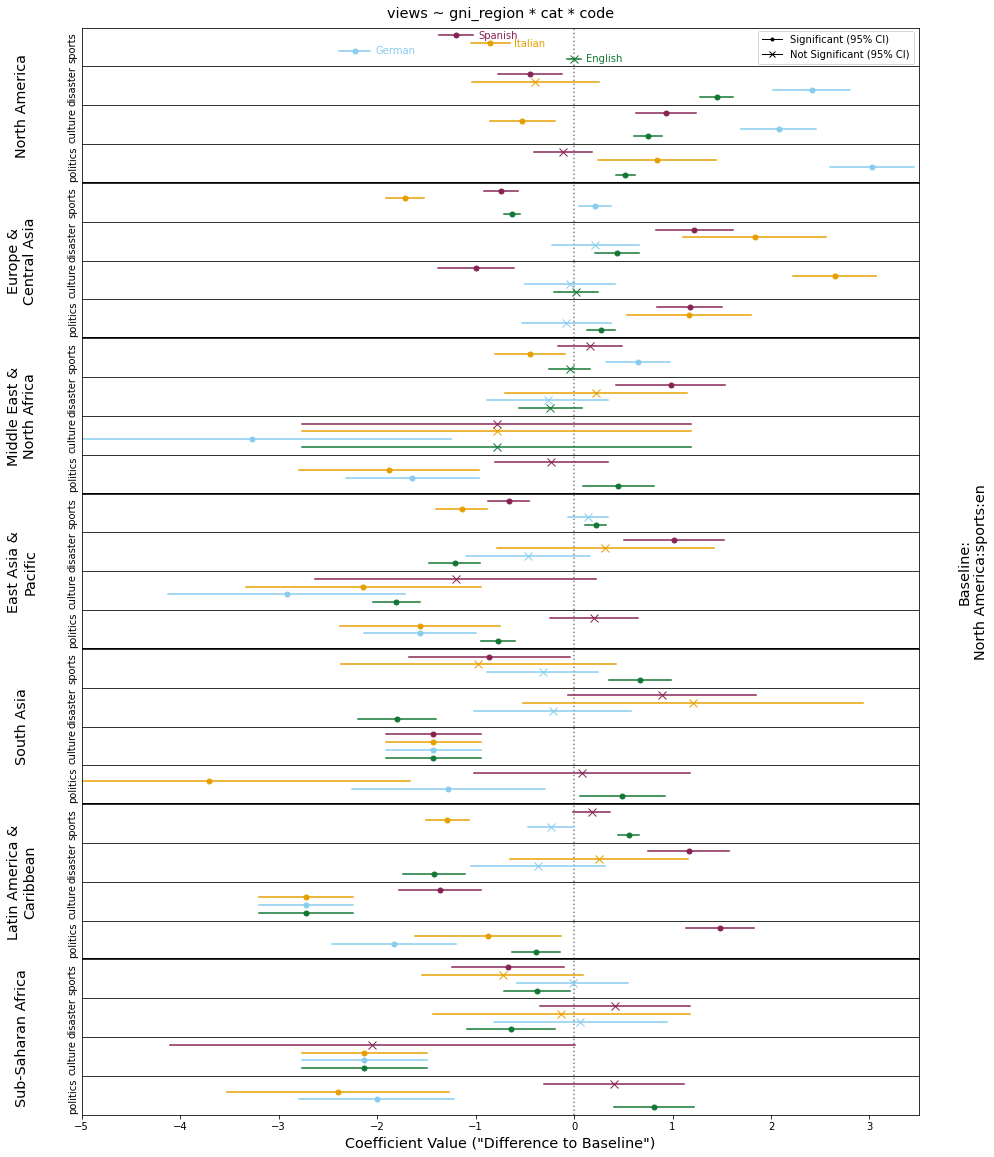

In [21]:
# fix for regression
results_model_int_region_cat = fit_regression_and_rename_coeffs(
    data[(data.views_7_sum > np.log1p(10)) & (data.cat != 'undefined')],
    formula="views_7_sum ~ (C(gni_region, Treatment(reference='North America')) *  C(cat, Treatment(reference='sports'))) * C(code, Treatment(reference='en'))")
fig_intregioncat = plot_regression_results_interactions(data[(data.views_7_sum > np.log1p(10)) & (data.cat != 'undefined')],
                                                results_model_int_region_cat, ['gni_region:cat'],
                                                {'gni_class': 'H', 'in_code_lang': True,
                                                 'gni_region': 'North America', 'cat': 'sports', 'code': 'en'},
                                                label_sort={'gni_class': ['H', 'UM', 'LM', 'L'],
                                                            'cat': ['sports', 'disaster', 'culture', 'politics'],
                                                            'gni_region': ['North America', 'Europe & Central Asia','Middle East & North Africa', 'East Asia & Pacific', 'South Asia', 'Latin America & Caribbean', 'Sub-Saharan Africa']},
                                                cat_dict={'en': 'English', 'it': 'Italian', 'es': 'Spanish',
                                                          'de': 'German'}, title='views ~ gni_region * cat * code',
                                                label_rename_dict={'Middle East & North Africa': 'Middle East &\nNorth Africa', 'Latin America & Caribbean': 'Latin America &\nCaribbean', 'Europe & Central Asia': 'Europe &\nCentral Asia', 'East Asia & Pacific': 'East Asia &\nPacific'},
                                                figsize=(15, 20), x_limits=(-5,3.5))
write_reg_results(results_model_int_region_cat, 'model2a')
fig_intregioncat.savefig('regression_plot_interaction_regioncat.pdf')

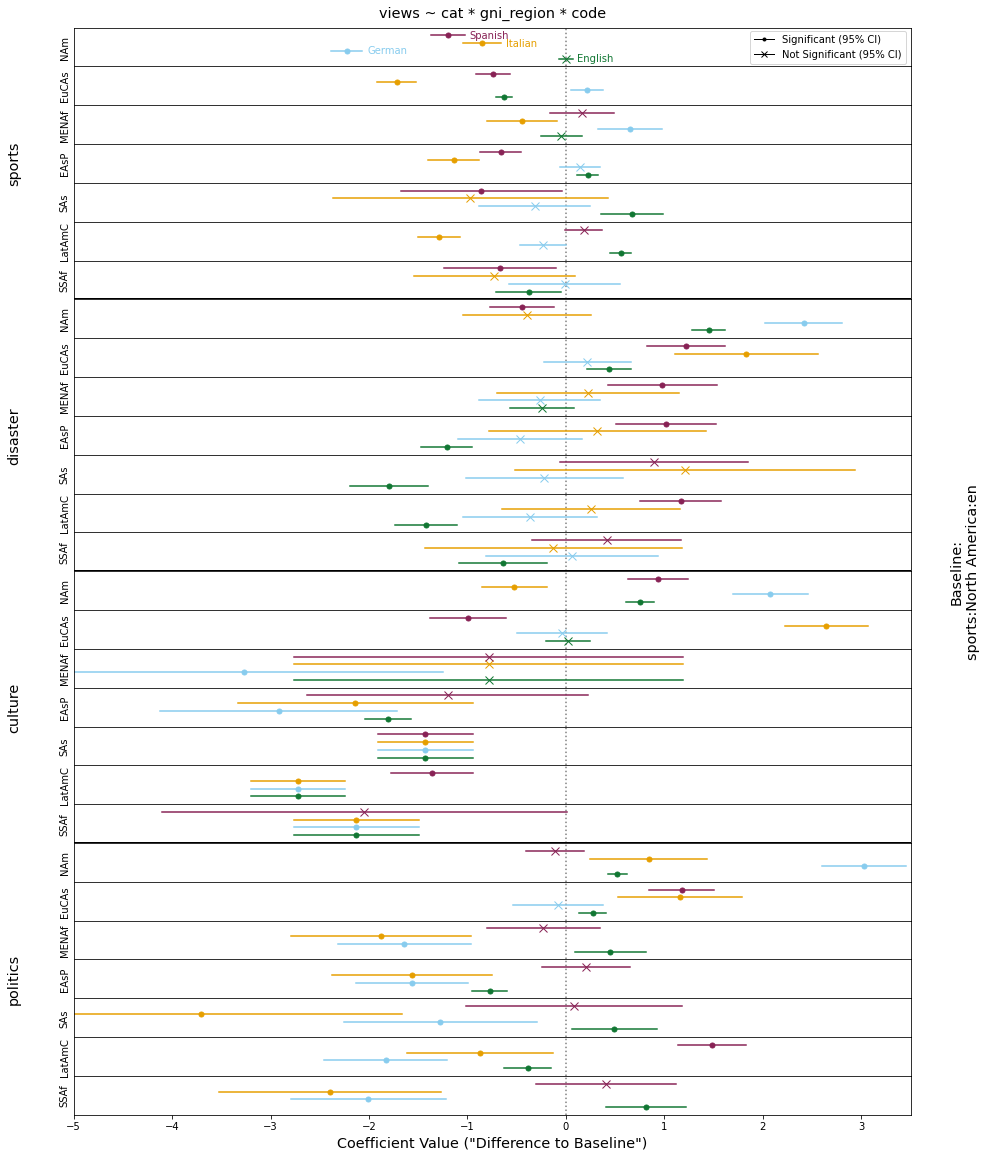

In [22]:
results_model_int_cat_region = fit_regression_and_rename_coeffs(
    data[(data.views_7_sum > np.log1p(10)) & (data.cat != 'undefined')],
    formula="views_7_sum ~ (C(cat, Treatment(reference='sports')) * C(gni_region, Treatment(reference='North America'))) * C(code, Treatment(reference='en'))")
fig_res_intcatregion = plot_regression_results_interactions(data[(data.views_7_sum > np.log1p(10)) & (data.cat != 'undefined')],
                                                    results_model_int_cat_region, ['cat:gni_region'],
                                                {'gni_class': 'H', 'in_code_lang': True,
                                                 'gni_region': 'North America', 'cat': 'sports', 'code': 'en'},
                                                label_sort={'gni_class': ['H', 'UM', 'LM', 'L'],
                                                            'cat': ['sports', 'disaster', 'culture', 'politics'],
                                                            'gni_region': ['North America', 'Europe & Central Asia','Middle East & North Africa', 'East Asia & Pacific', 'South Asia', 'Latin America & Caribbean', 'Sub-Saharan Africa']},
                                                cat_dict={'en': 'English', 'it': 'Italian', 'es': 'Spanish',
                                                          'de': 'German'}, title='views ~ cat * gni_region * code',
                                                label_rename_dict={'Middle East & North Africa': 'MENAf', 'Latin America & Caribbean': 'LatAmC', 'Europe & Central Asia': 'EuCAs', 'East Asia & Pacific': 'EAsP', 'North America': 'NAm', 'Sub-Saharan Africa': 'SSAf', 'South Asia': 'SAs'},
                                                figsize=(15, 20), x_limits=(-5,3.5))
write_reg_results(results_model_int_region_cat, 'model2b')
fig_res_intcatregion.savefig('regression_plot_interaction_catregion.pdf')

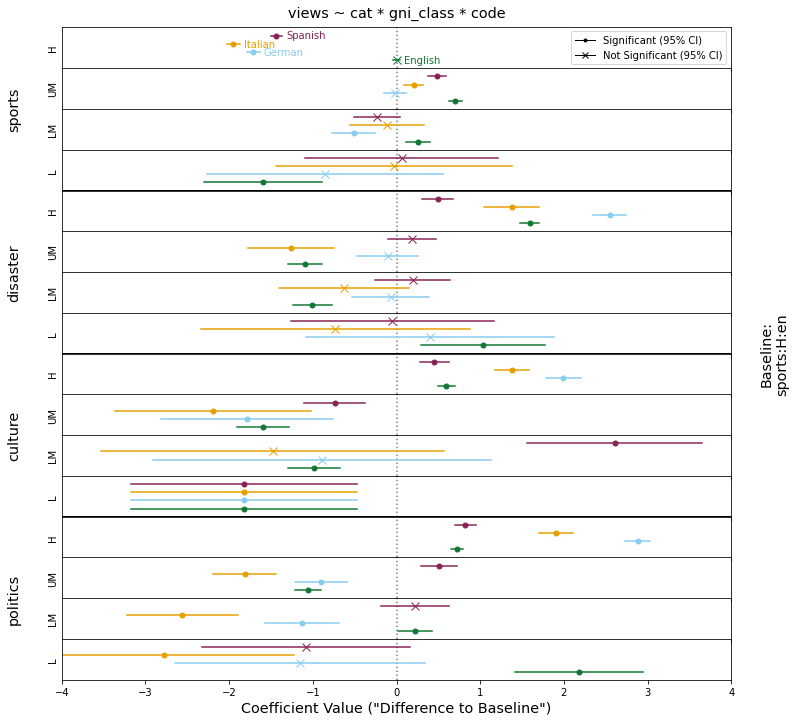

In [47]:
results_model_int_cat_class= fit_regression_and_rename_coeffs(
    data[(data.views_7_sum > np.log1p(10)) & (data.cat != 'undefined')],
    formula="views_7_sum ~ (C(cat, Treatment(reference='sports')) * C(gni_class, Treatment(reference='H'))) * C(code, Treatment(reference='en'))")
fig_int_cat_class = plot_regression_results_interactions(data[(data.views_7_sum > np.log1p(10)) & (data.cat != 'undefined')],
                                                results_model_int_cat_class, ['cat:gni_class'],
                                                {'gni_class': 'H', 'in_code_lang': True,
                                                 'gni_region': 'Europe & Central Asia', 'cat': 'sports', 'code': 'en'},
                                                label_sort={'gni_class': ['H', 'UM', 'LM',
                                                                          'L'],
                                                            'cat': ['sports', 'disaster', 'culture', 'politics']},
                                                cat_dict={'en': 'English', 'it': 'Italian', 'es': 'Spanish',
                                                          'de': 'German'}, title='views ~ cat * gni_class * code',
                                                figsize=(12, 12), x_limits=(-4,4), include_counts=False)
#write_reg_results(results_model_int_cat_class, 'model_int3')
fig_int_cat_class.savefig('regression_plot_interaction_catclass.pdf')

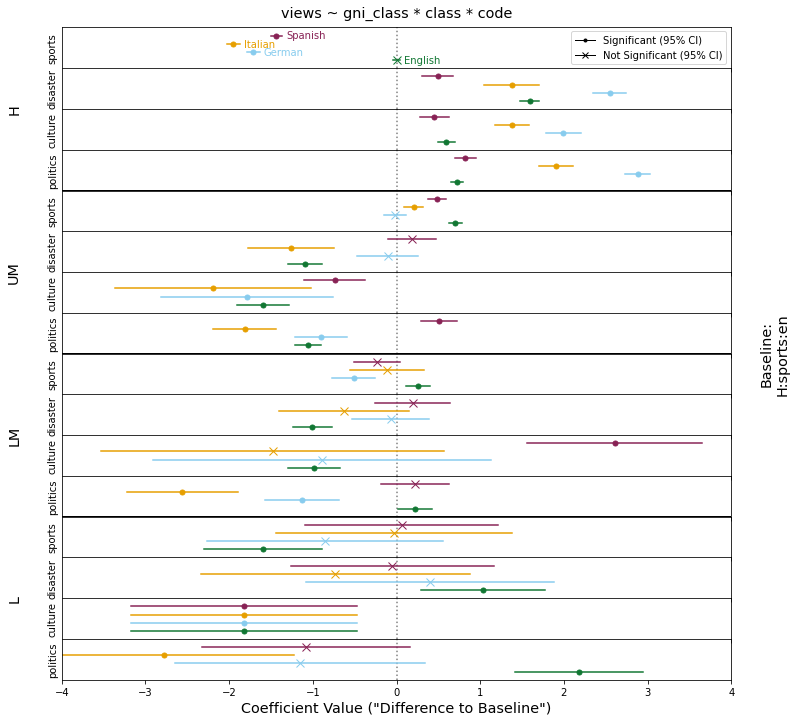

In [24]:
results_model_int_class_cat= fit_regression_and_rename_coeffs(
    data[(data.views_7_sum > np.log1p(10)) & (data.cat != 'undefined')], formula="views_7_sum ~ C(gni_class, Treatment(reference='H')) * C(cat, Treatment(reference='sports')) * C(code, Treatment(reference='en'))")
fig_int_class_cat = plot_regression_results_interactions(data[(data.views_7_sum > np.log1p(10)) & (data.cat != 'undefined')],
                                                         results_model_int_class_cat, ['gni_class:cat'],
                                                         {'gni_class': 'H', 'in_code_lang': True,
                                                          'gni_region': 'Europe & Central Asia', 'cat': 'sports', 'code': 'en'},
                                                         label_sort={'gni_class': ['H', 'UM', 'LM', 'L'],
                                                                     'cat': ['sports', 'disaster', 'culture', 'politics']},
                                                         cat_dict={'en': 'English', 'it': 'Italian', 'es': 'Spanish',
                                                                   'de': 'German'}, title='views ~ gni_class * class * code',
                                                         figsize=(12, 12), x_limits=(-4,4))
fig_int_class_cat.savefig('regression_plot_interaction_classcat.pdf')

### Other stuff

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            views_7_sum   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     163.1
Date:                Thu, 17 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:34:50   Log-Likelihood:                -29168.
No. Observations:               13817   AIC:                         5.838e+04
Df Residuals:                   13793   BIC:                         5.856e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      5.9197      0.317     18.694      0.000       5.299       6.540
cat[T.culture]                 0.1667      0.089      1.868      0.062      -0.008       0.342
cat[T.disaster]                1.0437      0.080     12.992      0.000       0.886       1.201
cat[T.politics]                0.5438      0.057      9.607      0.000       0.433       0.655
code[T.de]                    -2.7350      0.736     -3.719      0.000      -4.177      -1.293
code[T.es]                     0.5170      0.664      0.778      0.437      -0.785       1.819
code[T.it]                    -6.4942      0.904     -7.183      0.000      -8.266      -4.722
cat[T.culture]:code[T.de]      1.6443      0.225      7.302      0.000       1.203       2.086
cat[T.disaster]:code[T.de]     1.5403      0.169      9.140      0.000       1.210       1.871
cat[T.politics]:code[T.de]     2.0287      0.140     14.485      0.000       1.754       2.303
cat[T.culture]:code[T.es]      0.1278      0.176      0.726      0.468      -0.217       0.473
cat[T.disaster]:code[T.es]    -0.5658      0.150     -3.781      0.000      -0.859      -0.273
cat[T.politics]:code[T.es]     0.4323      0.115      3.774      0.000       0.208       0.657
cat[T.culture]:code[T.it]      0.7164      0.220      3.254      0.001       0.285       1.148
cat[T.disaster]:code[T.it]    -0.1230      0.239     -0.514      0.607      -0.592       0.346
cat[T.politics]:code[T.it]     0.7766      0.174      4.454      0.000       0.435       1.118
gdp_pc                        -0.0146      0.021     -0.709      0.478      -0.055       0.026
gdp_pc:code[T.de]              0.2578      0.046      5.561      0.000       0.167       0.349
gdp_pc:code[T.es]             -0.0883      0.042     -2.101      0.036      -0.171      -0.006
gdp_pc:code[T.it]              0.2633      0.058      4.559      0.000       0.150       0.377
population                     0.1354      0.014      9.859      0.000       0.109       0.162
population:code[T.de]         -0.1002      0.031     -3.247      0.001      -0.161      -0.040
population:code[T.es]         -0.0615      0.028     -2.178      0.029      -0.117      -0.006
population:code[T.it]          0.1015      0.033      3.031      0.002       0.036       0.167
==============================================================================
Omnibus:                       72.604   Durbin-Watson:                   1.572
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.545
Skew:                           0.144   Prob(JB):                     1.31e-15
Kurtosis:                       2.809   Cond. No.                     1.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the 

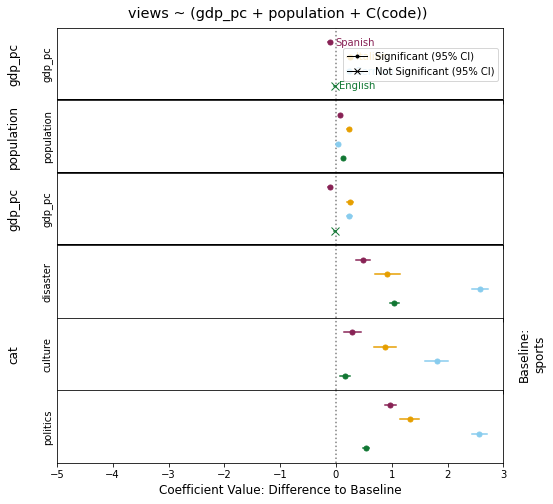

In [25]:
results_model_cont = fit_regression_and_rename_coeffs(
    data[(data.views_7_sum > np.log1p(10)) & (data.cat != 'undefined')],
    formula="views_7_sum ~ (gdp_pc + population + C(cat, Treatment(reference='sports'))) * C(code, Treatment(reference='en'))")
fig_res_cont = plot_regression_results(data[(data.views_7_sum > np.log1p(10)) & (data.cat != 'undefined')],
                                       results_model_cont, ['gdp_pc', 'population', 'gdp_pc', 'cat'],
                                       {'gni_class': 'H', 'gni_region': 'Europe & Central Asia', 'cat': 'sports',
                                        'code': 'en'}, label_sort={'gni_class': ['H', 'UM', 'LM', 'L'],
                                                                   'cat': ['sports', 'disaster', 'culture',
                                                                           'politics']},
                                       cat_dict={'en': 'English', 'it': 'Italian', 'es': 'Spanish', 'de': 'German'},
                                       title='views ~ (gdp_pc + population + C(code)) ', figsize=(8, 8), x_limits=(-5, 3))
results_model_cont.summary()

In [26]:
results_model_cont.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            views_7_sum   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     163.1
Date:                Thu, 17 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:34:51   Log-Likelihood:                -29168.
No. Observations:               13817   AIC:                         5.838e+04
Df Residuals:                   13793   BIC:                         5.856e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      5.9197      0.317     18.694      0.000       5.299       6.540
cat[T.culture]                 0.1667      0.089      1.868      0.062      -0.008       0.342
cat[T.disaster]                1.0437      0.080     12.992      0.000       0.886       1.201
cat[T.politics]                0.5438      0.057      9.607      0.000       0.433       0.655
code[T.de]                    -2.7350      0.736     -3.719      0.000      -4.177      -1.293
code[T.es]                     0.5170      0.664      0.778      0.437      -0.785       1.819
code[T.it]                    -6.4942      0.904     -7.183      0.000      -8.266      -4.722
cat[T.culture]:code[T.de]      1.6443      0.225      7.302      0.000       1.203       2.086
cat[T.disaster]:code[T.de]     1.5403      0.169      9.140      0.000       1.210       1.871
cat[T.politics]:code[T.de]     2.0287      0.140     14.485      0.000       1.754       2.303
cat[T.culture]:code[T.es]      0.1278      0.176      0.726      0.468      -0.217       0.473
cat[T.disaster]:code[T.es]    -0.5658      0.150     -3.781      0.000      -0.859      -0.273
cat[T.politics]:code[T.es]     0.4323      0.115      3.774      0.000       0.208       0.657
cat[T.culture]:code[T.it]      0.7164      0.220      3.254      0.001       0.285       1.148
cat[T.disaster]:code[T.it]    -0.1230      0.239     -0.514      0.607      -0.592       0.346
cat[T.politics]:code[T.it]     0.7766      0.174      4.454      0.000       0.435       1.118
gdp_pc                        -0.0146      0.021     -0.709      0.478      -0.055       0.026
gdp_pc:code[T.de]              0.2578      0.046      5.561      0.000       0.167       0.349
gdp_pc:code[T.es]             -0.0883      0.042     -2.101      0.036      -0.171      -0.006
gdp_pc:code[T.it]              0.2633      0.058      4.559      0.000       0.150       0.377
population                     0.1354      0.014      9.859      0.000       0.109       0.162
population:code[T.de]         -0.1002      0.031     -3.247      0.001      -0.161      -0.040
population:code[T.es]         -0.0615      0.028     -2.178      0.029      -0.117      -0.006
population:code[T.it]          0.1015      0.033      3.031      0.002       0.036       0.167
==============================================================================
Omnibus:                       72.604   Durbin-Watson:                   1.572
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.545
Skew:                           0.144   Prob(JB):                     1.31e-15
Kurtosis:                       2.809   Cond. No.                     1.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the 

## test single-code vs. original models

### basic model

In [27]:
formula = "views_7_sum ~ (C(gni_class, Treatment(reference='H')) + C(cat, Treatment(reference='sports')) + C(in_code_lang, Treatment(reference=True)))"
formula_mask = lambda d, code: (data.views_7_sum > np.log1p(10)) & (data.code == code)
results_model_views_de = fit_regression_and_rename_coeffs(formula=formula, df_reg=data[formula_mask(data, 'de')])
results_model_views_en = fit_regression_and_rename_coeffs(formula=formula, df_reg=data[formula_mask(data, 'en')])
results_model_views_es = fit_regression_and_rename_coeffs(formula=formula, df_reg=data[formula_mask(data, 'es')])
results_model_views_it = fit_regression_and_rename_coeffs(formula=formula, df_reg=data[formula_mask(data, 'it')])

#fig_res = plot_regression_results(data, results_model_views0, ['gni_class', 'in_code_lang', 'cat'], {'gni_class': 'H', 'in_code_lang': True, 'cat': 'sports', 'code': 'en'}, cat_dict={'en': 'English', 'it': 'Italian', 'es': 'Spanish', 'de': 'German'},  title='views ~ (gni_class + in_code_lang + cat) * code', figsize=(8, 8), x_limits=(-4,4))
results_models_all = {'de': results_model_views_de, 'en': results_model_views_en, 'es': results_model_views_es,
                      'it': results_model_views_it}

In [28]:
# examples
code = 'it'
print('Intercept', results_model_views0.params['Intercept'] + results_model_views0.params[f'code[T.{code}]'],
      results_models_all[code].params['Intercept'])
print('gni_class L',
      results_model_views0.params[f'gni_class[T.L]:code[T.{code}]'] + results_model_views0.params['gni_class[T.L]'],
      results_models_all[code].params['gni_class[T.L]'])
print('Cat disaster',
      results_model_views0.params[f'cat[T.disaster]:code[T.{code}]'] + results_model_views0.params['cat[T.disaster]'],
      results_models_all[code].params['cat[T.disaster]'])
print('in_code_lang',
      results_model_views0.params[f'in_code_lang[T.False]:code[T.{code}]'] + results_model_views0.params[
          'in_code_lang[T.False]'], results_models_all[code].params['in_code_lang[T.False]'])

Intercept 6.347374465728364 6.347374465728388
gni_class L -1.2843515329240718 -1.2843515329240827
Cat disaster 1.0561750938880592 1.0561750938880299
in_code_lang -0.23714149165888934 -0.2371414916588766


## with counts

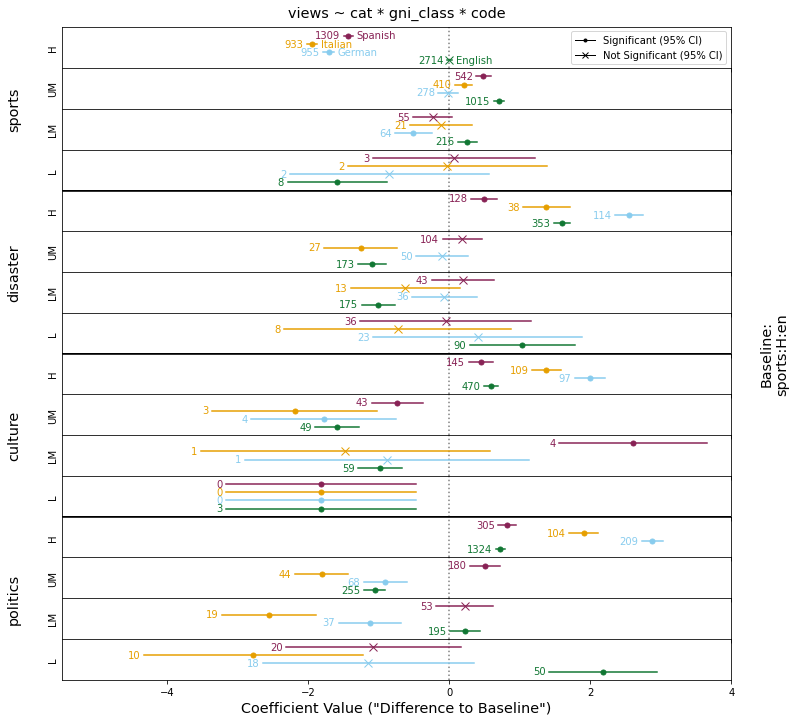

In [42]:
fig_int_cat_class = plot_regression_results_interactions(data[(data.views_7_sum > np.log1p(10)) & (data.cat != 'undefined')],
                                                         results_model_int_cat_class, ['cat:gni_class'],
                                                         {'gni_class': 'H', 'in_code_lang': True,
                                                          'gni_region': 'Europe & Central Asia', 'cat': 'sports', 'code': 'en'},
                                                         label_sort={'gni_class': ['H', 'UM', 'LM',
                                                                                   'L'],
                                                                     'cat': ['sports', 'disaster', 'culture', 'politics']},
                                                         cat_dict={'en': 'English', 'it': 'Italian', 'es': 'Spanish',
                                                                   'de': 'German'}, title='views ~ cat * gni_class * code',
                                                         figsize=(12, 12), x_limits=(-5.5,4), include_counts=True)
#write_reg_results(results_model_int_cat_class, 'model_int3')
fig_int_cat_class.savefig('regression_plot_interaction_catclass_counts.pdf')

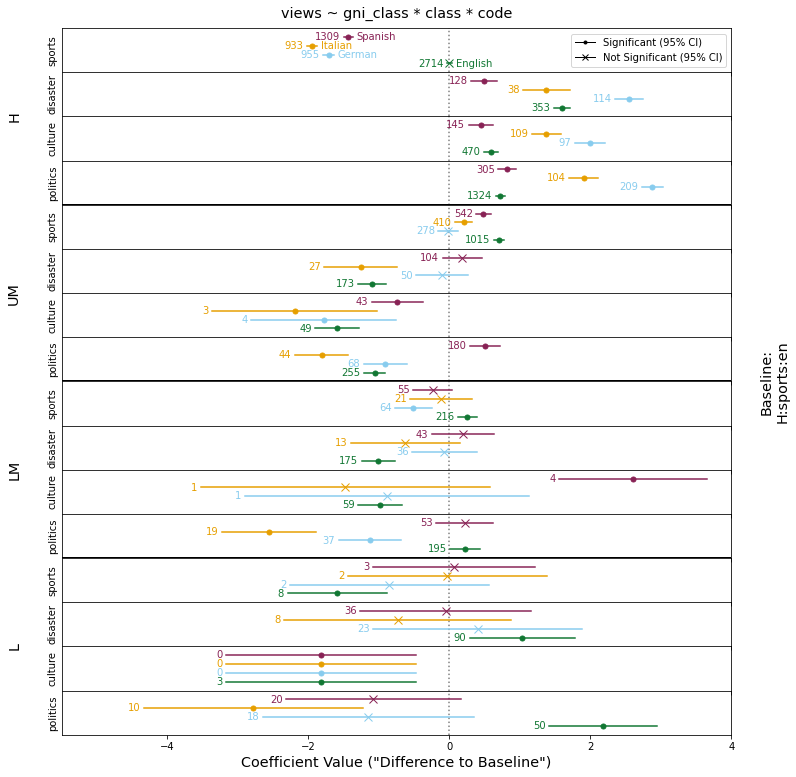

In [41]:
fig_int_class_cat = plot_regression_results_interactions(data[(data.views_7_sum > np.log1p(10)) & (data.cat != 'undefined')],
                                                         results_model_int_class_cat, ['gni_class:cat'],
                                                         {'gni_class': 'H', 'in_code_lang': True,
                                                          'gni_region': 'Europe & Central Asia', 'cat': 'sports', 'code': 'en'},
                                                         label_sort={'gni_class': ['H', 'UM', 'LM', 'L'],
                                                                     'cat': ['sports', 'disaster', 'culture', 'politics']},
                                                         cat_dict={'en': 'English', 'it': 'Italian', 'es': 'Spanish',
                                                                   'de': 'German'}, title='views ~ gni_class * class * code',
                                                         figsize=(12, 13), x_limits=(-5.5,4), include_counts=True)
fig_int_cat_class.savefig('regression_plot_interaction_classcat_counts.pdf')

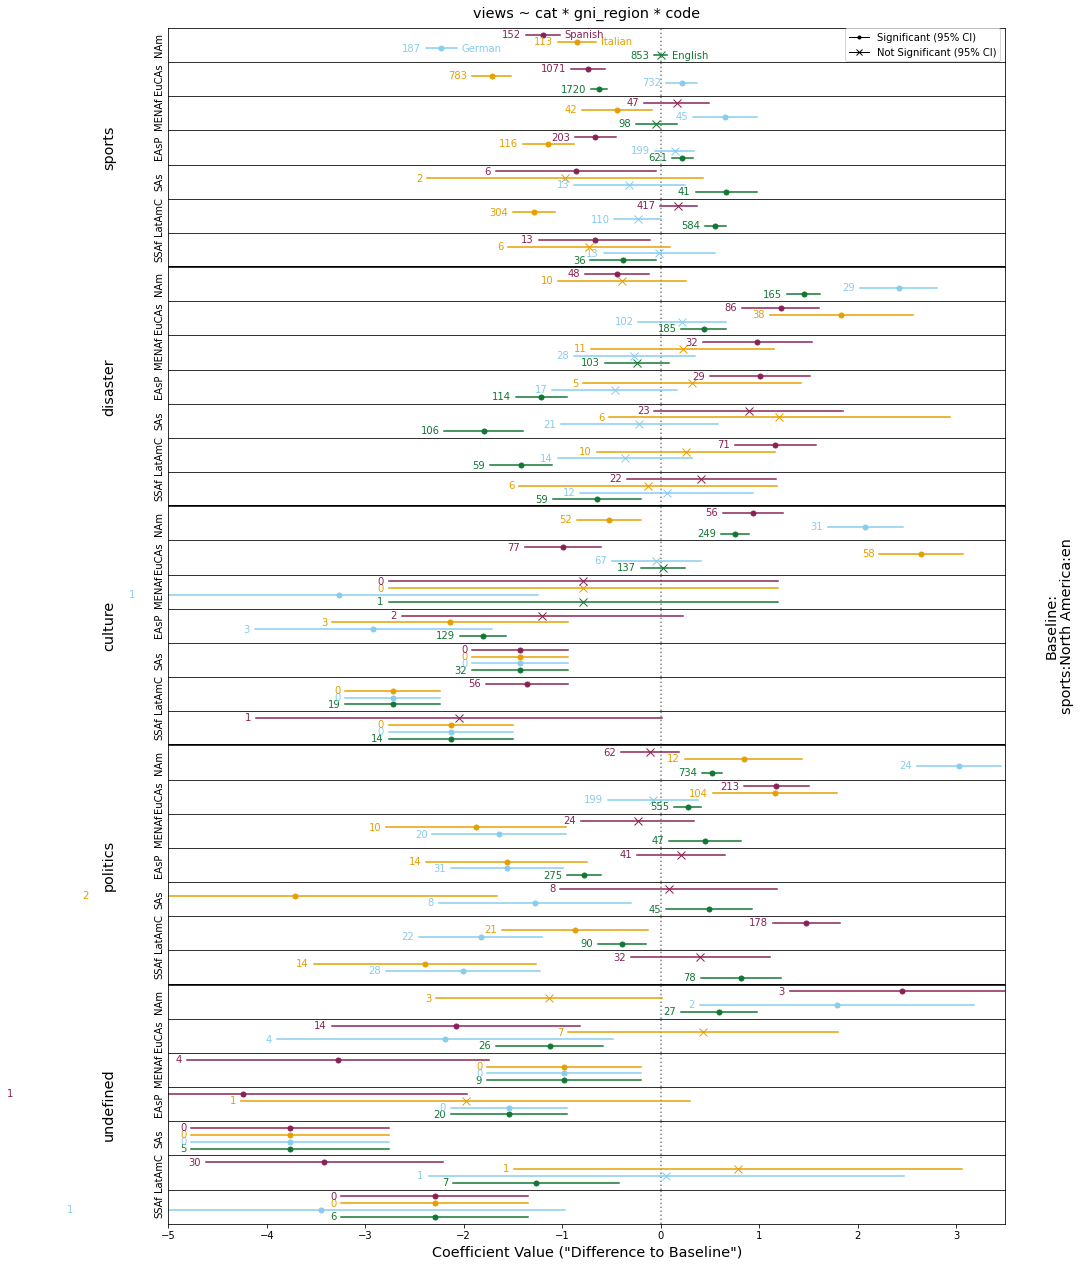

In [53]:
results_model_int_cat_region = fit_regression_and_rename_coeffs(
    data[(data.views_7_sum > np.log1p(10))],
    formula="views_7_sum ~ (C(cat, Treatment(reference='sports')) * C(gni_region, Treatment(reference='North America'))) * C(code, Treatment(reference='en'))")

fig_res_intcatregion = plot_regression_results_interactions(
    data[(data.views_7_sum > np.log1p(10))],
    results_model_int_cat_region, ['cat:gni_region'],
    {'gni_class': 'H', 'in_code_lang': True,
     'gni_region': 'North America', 'cat': 'sports', 'code': 'en'},
    label_sort={'gni_class': ['H', 'UM', 'LM', 'L'],
                'cat': ['sports', 'disaster', 'culture', 'politics', 'undefined'],
                'gni_region': ['North America', 'Europe & Central Asia', 'Middle East & North Africa',
                               'East Asia & Pacific', 'South Asia', 'Latin America & Caribbean', 'Sub-Saharan Africa']},
    cat_dict={'en': 'English', 'it': 'Italian', 'es': 'Spanish',
              'de': 'German'}, title='views ~ cat * gni_region * code',
    label_rename_dict={'Middle East & North Africa': 'MENAf', 'Latin America & Caribbean': 'LatAmC',
                       'Europe & Central Asia': 'EuCAs', 'East Asia & Pacific': 'EAsP', 'North America': 'NAm',
                       'Sub-Saharan Africa': 'SSAf', 'South Asia': 'SAs'},
    figsize=(15, 22), x_limits=(-5, 3.5), include_counts=True)
#write_reg_results(results_model_int_region_cat, 'model2b')
#fig_res_intcatregion.savefig('regression_plot_interaction_catregion_counts.pdf')

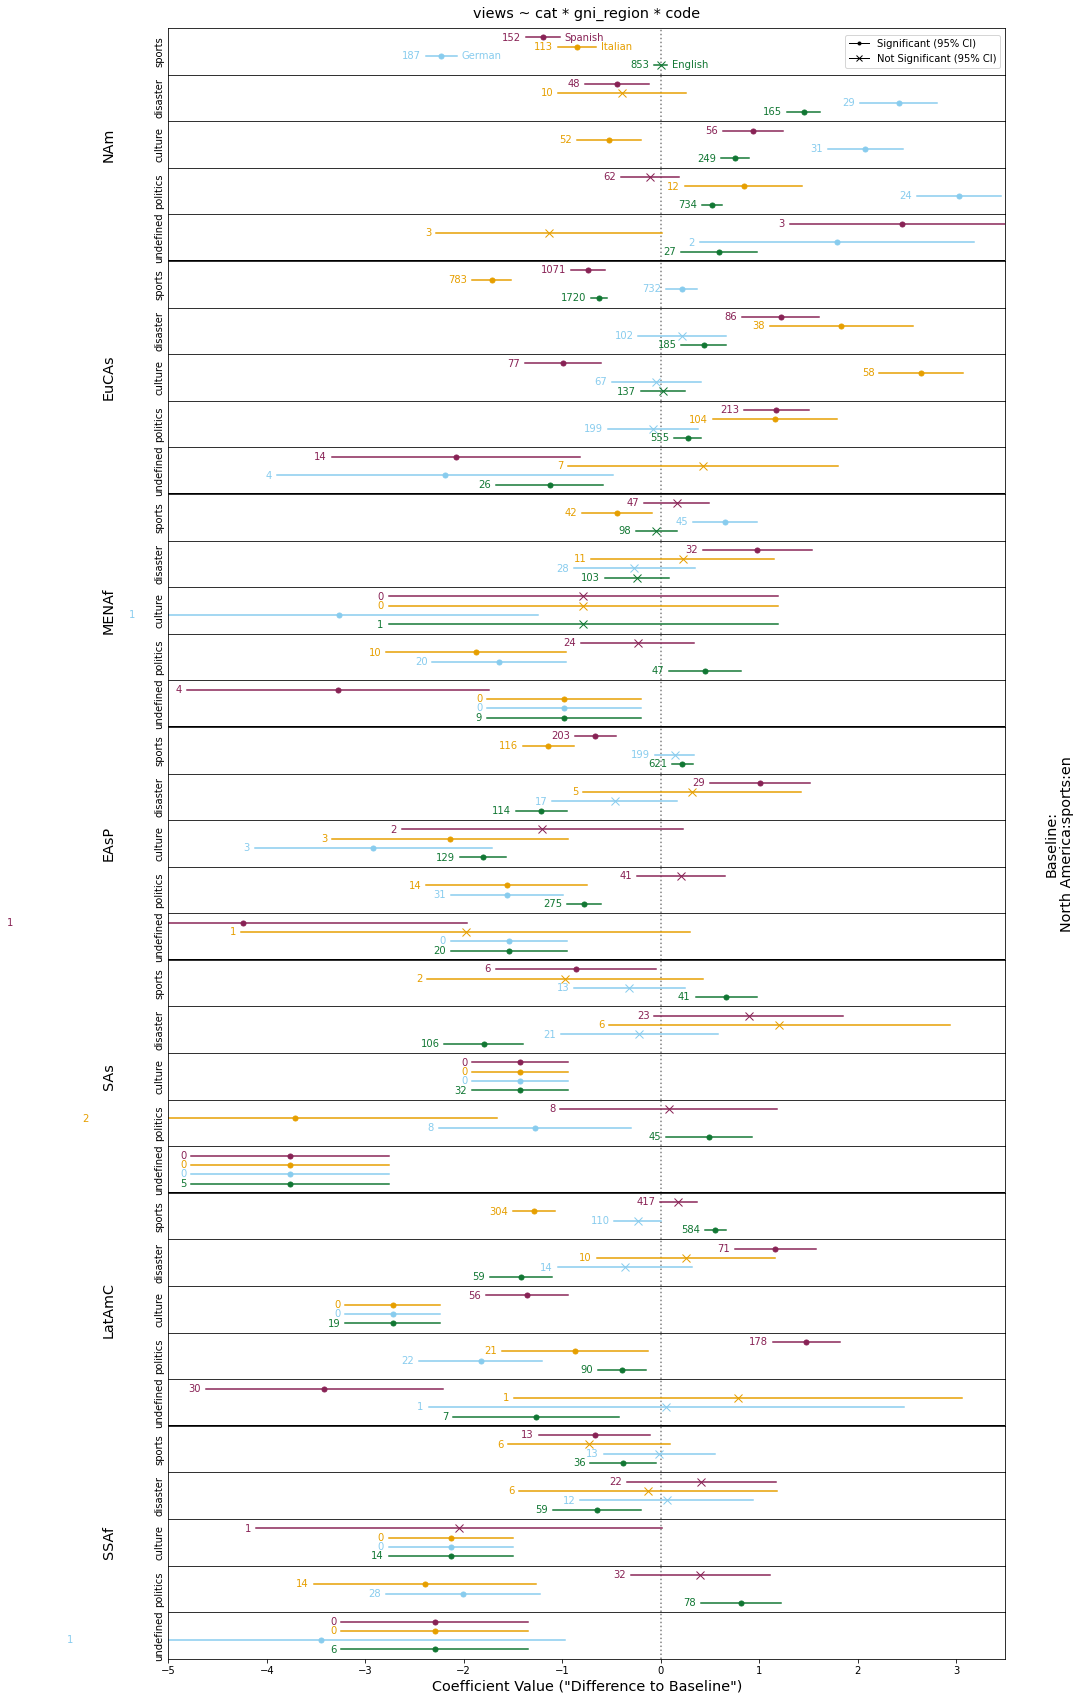

In [50]:
results_model_int_region_cat = fit_regression_and_rename_coeffs(
    data[(data.views_7_sum > np.log1p(10))],
    formula="views_7_sum ~ (C(gni_region, Treatment(reference='North America')) *  C(cat, Treatment(reference='sports'))) * C(code, Treatment(reference='en'))")
fig_res_catintregion = plot_regression_results_interactions(
    data[(data.views_7_sum > np.log1p(10))],
    results_model_int_region_cat, ['gni_region:cat'],
    {'gni_class': 'H', 'in_code_lang': True,
     'gni_region': 'North America', 'cat': 'sports', 'code': 'en'},
    label_sort={'gni_class': ['H', 'UM', 'LM', 'L'],
                'cat': ['sports', 'disaster', 'culture', 'politics', 'undefined'],
                'gni_region': ['North America', 'Europe & Central Asia', 'Middle East & North Africa',
                               'East Asia & Pacific', 'South Asia', 'Latin America & Caribbean', 'Sub-Saharan Africa']},
    cat_dict={'en': 'English', 'it': 'Italian', 'es': 'Spanish',
              'de': 'German'}, title='views ~ cat * gni_region * code',
    label_rename_dict={'Middle East & North Africa': 'MENAf', 'Latin America & Caribbean': 'LatAmC',
                       'Europe & Central Asia': 'EuCAs', 'East Asia & Pacific': 'EAsP', 'North America': 'NAm',
                       'Sub-Saharan Africa': 'SSAf', 'South Asia': 'SAs'},
    figsize=(15, 30), x_limits=(-5, 3.5), include_counts=True)
#write_reg_results(results_model_int_region_cat, 'model2b')
#fig_res_catintregion.savefig('regression_plot_interaction_regioncat_counts.pdf')

In [56]:
df_crawled.head()

,event_id,pagetitle,event_date,economic_region,country,continent,cat,categories,views_7_sum,views_before_mean,...,gni_class,gni_region,population,Country/Area,Year,GDP_pc,GDP,oecd,in_code_lang,in_code_region
0,Q100021,Pakistan International Airlines Flight 661,2016-12-07,Global South,Pakistan,Asia,disaster,"['Category:2016 disasters in Pakistan', 'Categ...",248274,0.000000,...,LM,South Asia,2.036314e+08,Pakistan,2016.0,1362.860008,2.775210e+11,False,True,False
1,Q100231328,Gretchen Whitmer kidnapping plot,2020-10-08,Global North,United States,North America,disaster,"['Category:2020 crimes in the United States', ...",74144,0.000000,...,H,North America,3.294841e+08,United States,2020.0,63122.594145,2.089375e+13,True,True,True
2,Q100256872,Killing of Babu Lal Vaishnav,2020-10-08,Global South,India,Asia,disaster,"['Category:2020 crimes in India', 'Category:20...",427,0.000000,...,LM,South Asia,1.380004e+09,India,2020.0,1930.971218,2.664749e+12,False,True,False
3,Q100279235,Miss Vietnam 2020,2020-11-20,Global South,Vietnam,Asia,culture,"['Category:2020 beauty pageants', 'Category:Be...",1444,49.285714,...,LM,East Asia & Pacific,9.733858e+07,Vietnam,2020.0,2785.724225,2.711584e+11,False,False,False
4,Q100288161,2020 Ganja missile attacks,2020-10-11,Global South,Azerbaijan,Asia,disaster,"['Category:2020 in Azerbaijan', 'Category:Arti...",7410,0.000000,...,UM,Europe & Central Asia,1.009312e+07,Azerbaijan,2020.0,4202.232239,4.260718e+10,False,False,False


## Interaction model

In [29]:
formula = "views_7_sum ~ (C(gni_class, Treatment(reference='H')) * C(cat, Treatment(reference='sports')))"
formula_mask_int = lambda d, code: (d.views_7_sum > np.log1p(10)) & (d.code == code) & (d.cat != 'undefined')

results_model_int_de = fit_regression_and_rename_coeffs(formula=formula, df_reg=data[formula_mask_int(data, 'de')])
results_model_int_en = fit_regression_and_rename_coeffs(formula=formula, df_reg=data[formula_mask_int(data, 'en')])
results_model_int_es = fit_regression_and_rename_coeffs(formula=formula, df_reg=data[formula_mask_int(data, 'es')])
results_model_int_it = fit_regression_and_rename_coeffs(formula=formula, df_reg=data[formula_mask_int(data, 'it')])
#fig_res = plot_regression_results(data, results_model_views0, ['gni_class', 'in_code_lang', 'cat'], {'gni_class': 'H', 'in_code_lang': True, 'cat': 'sports', 'code': 'en'}, cat_dict={'en': 'English', 'it': 'Italian', 'es': 'Spanish', 'de': 'German'},  title='views ~ (gni_class + in_code_lang + cat) * code', figsize=(8, 8), x_limits=(-4,4))
results_models_int_all = {'de': results_model_int_de, 'en': results_model_int_en, 'es': results_model_int_es, 'it': results_model_int_it}

In [30]:
results_model_int_de.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            views_7_sum   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     57.27
Date:                Thu, 17 Feb 2022   Prob (F-statistic):          1.41e-134
Time:                        11:34:51   Log-Likelihood:                -3925.6
No. Observations:                1956   AIC:                             7881.
Df Residuals:                    1941   BIC:                             7965.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           6.3064      0.058    107.829      0.000       6.192       6.421
gni_class[T.L]                     -0.8512      1.279     -0.665      0.506      -3.360       1.658
gni_class[T.LM]                    -0.5102      0.233     -2.186      0.029      -0.968      -0.052
gni_class[T.UM]                    -0.0188      0.123     -0.153      0.879      -0.260       0.223
cat[T.culture]                      1.9938      0.193     10.352      0.000       1.616       2.372
cat[T.disaster]                     2.5470      0.179     14.222      0.000       2.196       2.898
cat[T.politics]                     2.8805      0.138     20.870      0.000       2.610       3.151
gni_class[T.L]:cat[T.culture]     6.65e-16   9.71e-16      0.685      0.493   -1.24e-15    2.57e-15
gni_class[T.LM]:cat[T.culture]     -0.8863      1.832     -0.484      0.629      -4.478       2.706
gni_class[T.UM]:cat[T.culture]     -1.7835      0.930     -1.917      0.055      -3.608       0.041
gni_class[T.L]:cat[T.disaster]      0.4004      1.344      0.298      0.766      -2.236       3.037
gni_class[T.LM]:cat[T.disaster]    -0.0695      0.417     -0.167      0.868      -0.887       0.748
gni_class[T.UM]:cat[T.disaster]    -0.1070      0.330     -0.324      0.746      -0.755       0.541
gni_class[T.L]:cat[T.politics]     -1.1495      1.354     -0.849      0.396      -3.805       1.506
gni_class[T.LM]:cat[T.politics]    -1.1309      0.398     -2.842      0.005      -1.911      -0.350
gni_class[T.UM]:cat[T.politics]    -0.9065      0.281     -3.229      0.001      -1.457      -0.356
==============================================================================
Omnibus:                       37.396   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.760
Skew:                           0.220   Prob(JB):                     5.76e-12
Kurtosis:                       3.664   Cond. No.                     1.92e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.91e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [31]:
# examples
code = 'it'
print('Intercept', results_model_views2.params['Intercept'] + results_model_views2.params[f'code[T.{code}]'],
      results_models_int_all[code].params['Intercept'])
print('gni_class L',
      results_model_views2.params[f'gni_class[T.L]:code[T.{code}]'] + results_model_views2.params['gni_class[T.L]'],
      results_models_int_all[code].params['gni_class[T.L]'])
print('')
print('Cat disaster',
      results_model_views2.params[f'cat[T.disaster]:code[T.{code}]'] + results_model_views2.params['cat[T.disaster]'],
      results_models_int_all[code].params['cat[T.disaster]'])

NameError: name 'results_model_views2' is not defined

In [ ]:
results_model_int_de